<a href="https://colab.research.google.com/github/sandeeppalakkal/ML_Datascience_Practice/blob/master/Wine_Classification_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This is a practice of wine classification as done in [this](https://www.datacamp.com/community/tutorials/deep-learning-python?utm_source=adwords_ppc) datacamp tutorial. The dataset is available at [UCI ML repository website](http://archive.ics.uci.edu/ml/datasets/Wine+Quality). More details on data is available at UCI repository as well as the datacamp weblink, shared above.

## Loading and Familiarising the Data

In [0]:
import pandas as pd
# Getting the data
white_wine_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
red_wine_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white = pd.read_csv(white_wine_data,sep=';')
red = pd.read_csv(red_wine_data,sep=';')

In [8]:
# Print information
print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [9]:
# Print information
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [10]:
# Checking if any value is null
pd.isnull(red).all()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [11]:
pd.isnull(white).all()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [12]:
print(red.keys())
print(white.keys())
print(len(red.keys()))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
12


In [14]:
# describe the data statistically
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [15]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Visualization

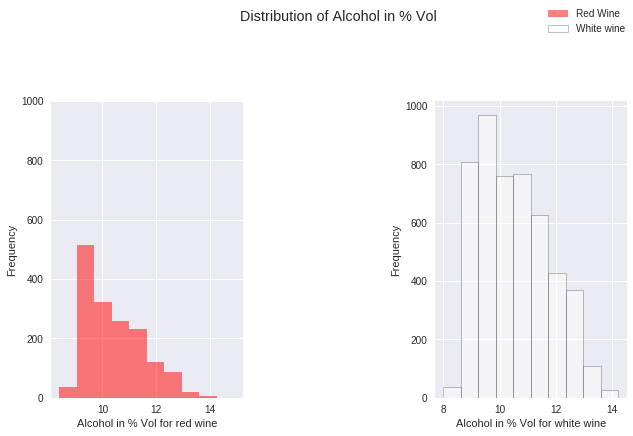

In [39]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2)
ax[0].hist(red.alcohol,10,facecolor='red',alpha=0.5,label="Red Wine")
ax[1].hist(white.alcohol,10,facecolor='white',ec='black',lw=0.5,alpha=0.5,label="White wine")

fig.subplots_adjust(left=0,right=1,bottom=0,top=0.75,hspace=0.,wspace=1)
ax[0].set_ylim([0,1000])
ax[0].set_xlabel("Alcohol in % Vol for red wine")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol for white wine")
ax[1].set_ylabel("Frequency")
fig.suptitle("Distribution of Alcohol in % Vol")
fig.legend(loc='upper right')
plt.show()

## Preprocessing of Data

In [45]:
red['type'] = 1
white['type'] = 0
wines = red.append(white)
wines.iloc[red.shape[0]-5:red.shape[0]+5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0


In [46]:
wines = red.append(white,ignore_index=True)
wines.iloc[red.shape[0]-5:red.shape[0]+5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1
1599,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1600,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
1601,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
1602,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
1603,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0


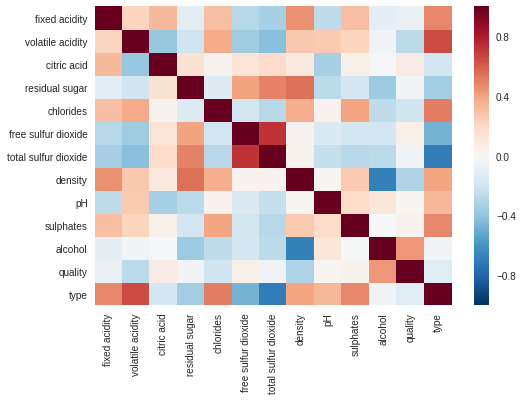

In [48]:
# correlation matrix
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

plt.show()

We can make observations such as alcohol level and type are not correlated, volatile acidity has a large positive correlation with type, etc.


## Wine Classification

In [0]:
# Split data into train & test
from sklearn.model_selection import train_test_split
import numpy as np
X = wines.iloc[:,0:11]
y = np.ravel(wines.type)

# splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [55]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4352, 11) (2145, 11) (4352,) (2145,)


## Modeling using Keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12,activation='relu',input_shape=(11,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [58]:
model.output.shape

TensorShape([Dimension(None), Dimension(1)])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'trainable': True,
    'units': 12,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale':

In [61]:
model.get_weights()

[array([[ 0.42020726, -0.15057442, -0.27767035, -0.33026713, -0.08775941,
         -0.29276097,  0.3697089 ,  0.13768458,  0.41848248,  0.02931875,
          0.3572538 ,  0.19619042],
        [-0.2016483 ,  0.12949038,  0.35836536,  0.32861286,  0.13726634,
          0.27895033,  0.06656915, -0.2539453 ,  0.08205289,  0.10132837,
          0.1852535 ,  0.1390863 ],
        [ 0.12220502, -0.3696224 ,  0.31678963,  0.48443896,  0.05858499,
          0.12167346, -0.22130823, -0.07865003, -0.25372463, -0.33859473,
         -0.33135384,  0.04684091],
        [-0.38964498,  0.2769323 ,  0.27457756,  0.06638908, -0.2995652 ,
         -0.19023278, -0.34167486, -0.01711851, -0.03033456, -0.1114572 ,
          0.21147966,  0.4512021 ],
        [-0.4286935 ,  0.28710586, -0.50719815, -0.2541115 ,  0.48900205,
         -0.22453961,  0.1105426 ,  0.28281963,  0.30726552, -0.41344398,
         -0.14680102, -0.2924647 ],
        [-0.09587863,  0.49354106, -0.34287566, -0.2634861 ,  0.3737164 ,
      

## Training the Model

In [63]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=1,verbose=1)

Epoch 1/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.2514 - acc: 0.9228
Epoch 2/20
4352/4352 [==============================] - 4s 992us/step - loss: 0.1728 - acc: 0.9393
Epoch 3/20
4352/4352 [==============================] - 4s 1ms/step - loss: 0.1574 - acc: 0.9501
Epoch 4/20
4352/4352 [==============================] - 4s 1ms/step - loss: 0.1312 - acc: 0.9563
Epoch 5/20
4352/4352 [==============================] - 4s 1ms/step - loss: 0.1152 - acc: 0.9623
Epoch 6/20
4352/4352 [==============================] - 4s 996us/step - loss: 0.0994 - acc: 0.9655
Epoch 7/20
4352/4352 [==============================] - 4s 1ms/step - loss: 0.0939 - acc: 0.9674
Epoch 8/20
4352/4352 [==============================] - 4s 985us/step - loss: 0.0842 - acc: 0.9722
Epoch 9/20
4352/4352 [==============================] - 4s 997us/step - loss: 0.0855 - acc: 0.9727
Epoch 10/20
4352/4352 [==============================] - 4s 1ms/step - loss: 0.0772 - acc: 0.9754
Epoch 11/20
4352/4352

## Testing the Model

In [0]:
y_pred = model.predict(X_test)

In [71]:
print(y_pred[:5])
print(y_test[:5])

[[2.98726009e-05]
 [6.16840780e-01]
 [1.78152535e-04]
 [1.47877945e-05]
 [2.40516874e-06]]
[0 1 0 0 0]


In [72]:
np.round(y_pred[:5])

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

## Evaluating the Model

In [73]:
score = model.evaluate(X_test,y_test,verbose=1)
# Loss & Accuracy
print(score)

2145/2145 [==============================] - 0s 18us/step
[0.08702201566745818, 0.9790209790209791]


In [75]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,cohen_kappa_score
confusion_matrix(y_test,np.round(y_pred))

array([[1570,   18],
       [  27,  530]])

In [77]:
# Precision & Recall
precision = precision_score(y_test,np.round(y_pred))
recall = recall_score(y_test,np.round(y_pred))
print("Precision = %f" % (precision))
print("Recall = %f" % (recall))

Precision = 0.967153
Recall = 0.951526


In [80]:
f1_score(y_test,np.round(y_pred))

0.9592760180995474

In [79]:
cohen_kappa_score(y_test,np.round(y_pred))

0.9451485520979365